# **Exemplos com imagens de satélite**

Agora vamos utilizar o numpy para carregar e processar imagens de satélite. Para isso, vamos utilizar uma imagem da NASA em formato tif:

In [3]:
###instalar a biblioteca
!pip install matplotlib -q

  Using cached matplotlib-3.7.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.6 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.39.3-py3-none-any.whl (1.0 MB)
  Using cached kiwisolver-1.4.4-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.6 MB)


In [4]:
##Importar a biblioteca
import rasterio
from rasterio.plot import show
import numpy as np

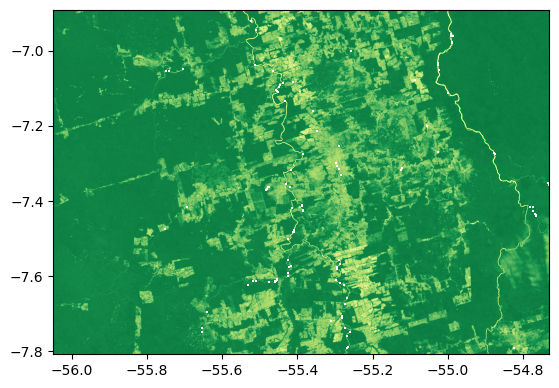

<Axes: >

In [5]:
# carregando a imagem
img = rasterio.open('./NDVI_2020.tif')
# exibindo a imagem
show(img,cmap='RdYlGn')

In [ ]:
##Metadados
img.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': None,
 'width': 4893,
 'height': 3398,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.00026949458523585647, 0.0, -56.04867535359772,
        0.0, -0.00026949458523585647, -6.891785028236558)}

In [ ]:
# lendo os dados dos pixels
dados_pixels = img.read(1)

# exibindo os dados dos pixels
print(dados_pixels)

[[0.9110253  0.901963   0.8911621  ... 0.8832156  0.8824123  0.8921877 ]
 [0.88915426 0.8869398  0.89635825 ... 0.891714   0.8966203  0.90134245]
 [0.9030397  0.8973591  0.9015357  ... 0.9006005  0.8952721  0.89141935]
 ...
 [0.8835134  0.8943556  0.8762134  ... 0.9197013  0.87448394 0.87445587]
 [0.86910766 0.8965047  0.8510199  ... 0.920594   0.86033386 0.87801963]
 [0.8851913  0.88954246 0.8620428  ... 0.9132906  0.886454   0.8687273 ]]


In [ ]:
# calculando a média dos dados dos pixels
media = np.nanmean(dados_pixels)
print('media',media)
# calculando o desvio padrão dos dados dos pixels
desvio_padrao = np.nanstd(dados_pixels)
print('desvio_padrao',desvio_padrao)
# calculando a mediana dos dados dos pixels
mediana = np.nanmedian(dados_pixels)
print('mediana',mediana)

media 0.7967653
desvio_padrao 0.16817874
mediana 0.8765425


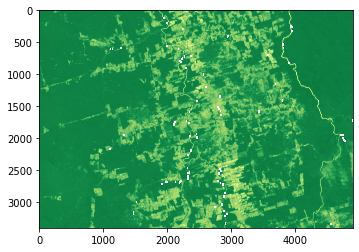

In [ ]:
##Importando as bibliotecas
import matplotlib.pyplot as plt
##Visualizando o dados 
plt.imshow(dados_pixels, cmap='RdYlGn')
plt.show()

Para converter os dados de uma matriz numpy para uma imagem tif, podemos usar a biblioteca Rasterio novamente. Podemos criar um novo arquivo tif e escrever os dados da matriz no arquivo usando a função "rasterio.open" em modo de escrita, conforme o exemplo abaixo:

In [ ]:
# Ler a imagem
with rasterio.open('/content/drive/MyDrive/GEE/NDVI_2020.tif') as src:
    dados_pixels = src.read(1)
    meta = src.meta.copy()
    meta.update(dtype=rasterio.float32, nodata=-9999.99, compress='lzw')

# Salvar a imagem convertida
    with rasterio.open('imagem_convertida.tif', 'w', **meta) as dst:
        dst.write(dados_pixels.astype(rasterio.float32), 1)

In [ ]:
dst.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -9999.99,
 'width': 4893,
 'height': 3398,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.00026949458523585647, 0.0, -56.04867535359772,
        0.0, -0.00026949458523585647, -6.891785028236558)}

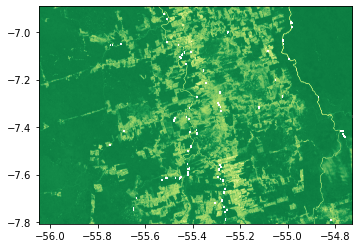

<AxesSubplot:>

In [ ]:
# carregando a imagem
img = rasterio.open("/content/imagem_convertida.tif")
# exibindo a imagem
show(img,cmap='RdYlGn')